# IBM Data Science Capstone - Neighborhoods
### This notebook will be used for the capstone project in the Data Science Professional Certificate

In [1]:
import pandas as pd
import numpy as np
import json
import requests
from geopy.geocoders import Nominatim # Convert an address into latitude and longitude values
import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Clustering machine learning algorithm

! pip install folium
import folium # map visualization

In [2]:
print ('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Introduction

You mighgt be a seasoned traveller that's been many places. You're a foodie and love theatres. You've travelled to many cities before and you don't really know where you would like to go next? Wouldn't it be nice to get new travel ideas? To find new cities based on how similar they are to the ones you liked in your previous travels?

Or, you might be a business man that travels around a world to sign deals. Everywhere you go, you need to take your futur clients out and entertain them to talk business in a relaxed setting.  Wouldn't it be nice if you could know how similar the next city you're going to go to is to the ones you know already? 

Usually, all these travels start with landing in a major city. Often, these are either country capitals or financial centers. The problem we're going to solve is to answer these questions: How is one city similar to the others? What are the most common venues that set these cities appart?

And to answer these questions, we're going to compare and cluster capitals and financial centers based on the Foursquare API explore venues feature.

# Data

The datasets we will need for this analysis are a list of capital cities and financial centers of the world. To build that list, we will scrape two pages from Wikipedia. 

Thoses pages are "List_of_national_capitals" and "Global_Financial_Centres_Index".
 
Next, we will need to get the venues in every city. For this, we will use the Fourquare API with the maximum setting of 100 000 meters. This will give us a range of 100 km to explore and will cover an area that would be accessible to travelers and business men for a day trip by car or public transport.

To feed the Foursquare API, we will need the geographical coordinates for every city. Those will be provided using the geocoders Nominatim library.

## Example of the capital cities dataset

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_national_capitals' 
dfs = pd.read_html(url)
print(dfs[1])

                                             City/Town     Country/Territory  \
0    Abidjan (former capital; still has many govern...           Ivory Coast   
1                              Yamoussoukro (official)           Ivory Coast   
2                                            Abu Dhabi  United Arab Emirates   
3                                                Abuja               Nigeria   
4                                                Accra                 Ghana   
..                                                 ...                   ...   
251                                           Windhoek               Namibia   
252                                            Yaoundé              Cameroon   
253                                   Yaren (de facto)                 Nauru   
254                                            Yerevan               Armenia   
255                                             Zagreb               Croatia   

                                       

In [4]:
dfCap = pd.DataFrame()
city = dfs[1]['City/Town'] 
country = dfs[1]['Country/Territory']  
dfCap['Capital'] = city
dfCap['Country'] = country
print(dfCap.shape)
dfCap.head(10)

(256, 2)


,Capital,Country
0,Abidjan (former capital; still has many govern...,Ivory Coast
1,Yamoussoukro (official),Ivory Coast
2,Abu Dhabi,United Arab Emirates
3,Abuja,Nigeria
4,Accra,Ghana
5,Adamstown,Pitcairn Islands
6,Addis Ababa,Ethiopia
7,"Aden (de facto, temporary)",Yemen
8,Sana'a (de jure),Yemen
9,Algiers,Algeria


## Example of the financial centers dataset

In [5]:
url2 = 'https://en.wikipedia.org/wiki/Global_Financial_Centres_Index' 
dff = pd.read_html(url2)
print(dff[1])

    Rank  Change            Centre  Rating  Change.1
0      1     NaN     New York City     770       1.0
1      2     NaN            London     766      24.0
2      3     1.0          Shanghai     748       8.0
3      4     1.0             Tokyo     747       6.0
4      5     1.0         Hong Kong     743       6.0
5      6     1.0         Singapore     742       4.0
6      7     NaN           Beijing     741       7.0
7      8     NaN     San Francisco     738       6.0
8      9     2.0          Shenzhen     732      10.0
9     10     4.0            Zurich     724       5.0
10    11     1.0       Los Angeles     720       3.0
11    12     6.0        Luxembourg     719       4.0
12    13     4.0         Edinburgh     718       2.0
13    14     5.0            Geneva     717      12.0
14    15    10.0            Boston     716       8.0
15    16     3.0         Frankfurt     715       5.0
16    17     5.0             Dubai     714       7.0
17    18     3.0             Paris     713    

In [6]:
dfFin = pd.DataFrame()
center1 = dff[1]['Centre']
center2 = dff[2]['Centre']
dfFin['Financial Center'] = center1.append(center2, ignore_index=True)
print(dfFin.shape)
dfFin.tail(10)

(111, 1)


,Financial Center
101,Tehran
102,Kuwait City
103,Saint Petersburg
104,Xi'an
105,Manila
106,Riyadh
107,Tianjin
108,Hangzhou
109,Dalian
110,Wuhan


## Example of geocoders

In [7]:
for x in range(0,5):
    address = dfFin.loc[x,'Financial Center']
    geolocator = Nominatim(user_agent="ny_explorer") 
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of ',dfFin.loc[x,'Financial Center'],  ' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of  New York City  are 40.7127281, -74.0060152.
The geograpical coordinate of  London  are 51.5073219, -0.1276474.
The geograpical coordinate of  Shanghai  are 31.2322758, 121.4692071.
The geograpical coordinate of  Tokyo  are 35.6828387, 139.7594549.
The geograpical coordinate of  Hong Kong  are 22.350627, 114.1849161.


## Example of Foursquare API explore venues feature

In [8]:
# The code was removed by Watson Studio for sharing.

In [9]:
city_latitude = latitude
city_longitude = longitude
city_name = dfFin.loc[x,'Financial Center']

print('Latitude and longitude values of {} are {}, {}.'.format(city_name,city_latitude,city_longitude))
VERSION = '20180605' # Foursquare API version

LIMIT = 5 # limit of number of venues returned by Foursquare API
radius = 100000 # define radius of 100 km
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
CLIENT_ID, CLIENT_SECRET, VERSION, city_latitude, city_longitude, radius,
LIMIT)
print(url) # display URL
results = requests.get(url).json() 
results

Latitude and longitude values of Hong Kong are 22.350627, 114.1849161.
https://api.foursquare.com/v2/venues/explore?&client_id=HGTQKEYL2BGEFGU2JS43LI4AOWASODLQC33WIYUKCBAMAPVK&client_secret=K2CFUHUWDCGEWHF144ORU0QSB32HRYSLVF4FFNYX2DJY3UMJ&v=20180605&ll=22.350627,114.1849161&radius=100000&limit=5


{'meta': {'code': 200, 'requestId': '5fbeb9019a95b82e63f304a6'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Hong Kong',
  'headerFullLocation': 'Hong Kong',
  'headerLocationGranularity': 'city',
  'totalResults': 240,
  'suggestedBounds': {'ne': {'lat': 23.2506279000009,
    'lng': 115.15620562749005},
   'sw': {'lat': 21.4506260999991, 'lng': 113.21362657250994}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb697b3ef159c74493d76f7',
       'name': 'Nan Lian Garden (南蓮園池)',
       'location': {'address': '60 Fung Tak Rd',
        'lat': 22.339033,
        'lng': 114.204766,
        'labeledLatLngs': [{'label': 'display',
          'lat': 22.339033,
          'lng': 114.2

# Methodology

In this section, we're going to explore the data and anlyse it. First, a complete dataset wil be built and cleaned. Folium will be used to visualize the cities in the dataset. 

After we have aquired all the cities we need and their coordinates, the Foursqare API will be used to build another dataframe with the venues that will be used to cluster the cities in groups based on their similarities. The K-Means machine learning algorithm will be used to cluster teh cities together.

Finally, another map will be presented to visualize the clusters and clusters will be presented with their most popular venues.

## Building the complete dataset including capital cities and financial centers

In [10]:
dfCities = pd.DataFrame()

dfCities['City'] = center1.append(center2,ignore_index=True).append(city, ignore_index=True)
print(dfCities.shape)
dfCities.tail(10)

(367, 1)


,City
357,Warsaw
358,"Washington, D.C."
359,Wellington
360,West Island
361,Willemstad
362,Windhoek
363,Yaoundé
364,Yaren (de facto)
365,Yerevan
366,Zagreb


Cleaning the city names by removing the comments or extra caracters following the names. All unwanted information is included in parentheses so we will use the opening parenthese "(" as a delimiter for the split.

In [11]:
for i in range(0,len(dfCities)):
    split = dfCities.loc[i,'City'].split("(")[0]
    dfCities.loc[i,'City'] = split

dfCities.head()

,City
0,New York City
1,London
2,Shanghai
3,Tokyo
4,Hong Kong


Adding lat/long columns

In [12]:
dfCities['Latitude'] = 0.0 
dfCities['Longitude'] = 0.0
dfCities.head()

,City,Latitude,Longitude
0,New York City,0.0,0.0
1,London,0.0,0.0
2,Shanghai,0.0,0.0
3,Tokyo,0.0,0.0
4,Hong Kong,0.0,0.0


Using geocoders to assign city coordinates in the dataframe

In [13]:
for i in range(0,len(dfCities)):
    address = dfCities.loc[i,'City']
    geolocator = Nominatim(user_agent="ny_explorer") 
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    dfCities.loc[i,'Latitude'] = latitude
    dfCities.loc[i,'Longitude'] = longitude
    if i % 37 == 0:
        print(round(i/len(dfCities)*100), "% complete")

dfCities.head()

0 % complete
10 % complete
20 % complete
30 % complete
40 % complete
50 % complete
60 % complete
71 % complete
81 % complete
91 % complete


,City,Latitude,Longitude
0,New York City,40.712728,-74.006015
1,London,51.507322,-0.127647
2,Shanghai,31.232276,121.469207
3,Tokyo,35.682839,139.759455
4,Hong Kong,22.350627,114.184916


In [14]:
dfCities.tail()

,City,Latitude,Longitude
362,Windhoek,-22.574392,17.079069
363,Yaoundé,3.868987,11.521334
364,Yaren,-0.547101,166.916400
365,Yerevan,40.177612,44.512585
366,Zagreb,45.813185,15.977177


## Visualizing the cities

In [15]:
# create world map using Zagreb latitude and longitude values (last in the dataframe)
map_world = folium.Map(location=[latitude, longitude], zoom_start=2, tiles='Stamen Toner' )
        
# add markers to map
for lat, lng, city in zip(dfCities['Latitude'], dfCities['Longitude'], dfCities['City']):
    label = '{}'.format(city) 
    label = folium.Popup(label, parse_html=True) 
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc', fill_opacity=0.7, parse_html=False).add_to(map_world)

map_world

## Using the Foursquare API to build the venues dataframe

In [19]:
VERSION = '20180605' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 100000 # define radius of 100 km

venues_list=[]
    
for i in range(0,len(dfCities)):
  
    if i % 37 == 0:
        print(round(i/len(dfCities)*100), "% complete")
        
    city_latitude = dfCities.loc[i,'Latitude']
    city_longitude = dfCities.loc[i,'Longitude']
    city_name = dfCities.loc[i,'City']

    # create URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, city_latitude, city_longitude, radius,
    LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items'] 
    
    venues_list.append([(
                    city_name,
                    city_latitude,
                    city_longitude,
                    v['venue']['name'],
                    v['venue']['location']['lat'], 
                    v['venue']['location']['lng'], 
                    v['venue']['categories'][0]['name']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['City','Latitude','Longitude', 'Venue','Venue Latitude','Venue Longitude','Venue Category']
nearby_venues.head()

0 % complete
10 % complete
20 % complete
30 % complete
40 % complete
50 % complete
60 % complete
71 % complete
81 % complete
91 % complete


,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New York City,40.712728,-74.006015,Aire Ancient Baths,40.718141,-74.004941,Spa
1,New York City,40.712728,-74.006015,9/11 Memorial North Pool,40.712077,-74.013187,Memorial Site
2,New York City,40.712728,-74.006015,Crown Shy,40.706187,-74.007490,Restaurant
3,New York City,40.712728,-74.006015,Los Tacos No. 1,40.714267,-74.008756,Taco Place
4,New York City,40.712728,-74.006015,The Rooftop @ Pier 17,40.705463,-74.001598,Music Venue


In [20]:
nearby_venues.tail()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
27873,Zagreb,45.813185,15.977177,Pizzeria Mihita,45.832979,16.068910,Pizza Place
27874,Zagreb,45.813185,15.977177,Leggiero bar,45.828473,16.050848,Bar
27875,Zagreb,45.813185,15.977177,IKEA Cafe,45.792317,16.155459,Café
27876,Zagreb,45.813185,15.977177,London,45.706893,16.049898,Bistro
27877,Zagreb,45.813185,15.977177,Barba Niko Restaurant,45.730101,16.066759,Restaurant







Lets analyse the size of the dataframe and a sample of the number of venues per city

In [21]:
nearby_venues.shape

(27878, 7)

In [22]:
nearby_venues.groupby('City').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Abidjan,48,48,48,48,48,48
Abu Dhabi,82,82,82,82,82,82
Abuja,57,57,57,57,57,57
Accra,65,65,65,65,65,65
Adamstown,1,1,1,1,1,1
...,...,...,...,...,...,...
Yaoundé,41,41,41,41,41,41
Yaren,4,4,4,4,4,4
Yerevan,100,100,100,100,100,100


## Encoding unique venues

In [23]:
print('There are {} uniques categories.'.format(len(nearby_venues['Venue Category'].unique())))

There are 566 uniques categories.


In [24]:
# one hot encoding
world_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add borough column back to dataframe
world_onehot['City'] = nearby_venues['City'] 

# move borough column to the first column
fixed_columns = [world_onehot.columns[-1]] + list(world_onehot.columns[:-1])
world_onehot = world_onehot[fixed_columns]

world_onehot.head()

,Zoo Exhibit,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
world_onehot.shape

(27878, 566)

Grouping the venues and looking at the most popular venues

In [26]:
world_grouped = world_onehot.groupby('City').mean().reset_index()
world_grouped

,City,Zoo Exhibit,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,...,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Abidjan,0.00,0.000000,0.0,0.0,0.0,0.104167,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00
1,Abu Dhabi,0.00,0.000000,0.0,0.0,0.0,0.024390,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00
2,Abuja,0.00,0.017544,0.0,0.0,0.0,0.035088,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00
3,Accra,0.00,0.000000,0.0,0.0,0.0,0.046154,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00
4,Adamstown,0.00,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Yaoundé,0.00,0.000000,0.0,0.0,0.0,0.097561,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00
316,Yaren,0.00,0.000000,0.0,0.0,0.0,0.000000,0.25,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00
317,Yerevan,0.00,0.000000,0.0,0.0,0.0,0.000000,0.01,0.0,0.0,...,0.01,0.0,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.00
318,Zagreb,0.00,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,...,0.01,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00


In [27]:
world_grouped.shape

(320, 566)

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = world_grouped['City']

for ind in np.arange(world_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(world_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abidjan,African Restaurant,Nightclub,Shopping Mall,Hotel,Ice Cream Shop,Italian Restaurant,Lounge,Bar,Restaurant,Pizza Place
1,Abu Dhabi,Hotel,Resort,Beach,Shopping Mall,Food Truck,Movie Theater,Mosque,Art Museum,Sandwich Place,Electronics Store
2,Abuja,Fast Food Restaurant,Shopping Mall,Hotel,Bed & Breakfast,Restaurant,Indian Restaurant,Department Store,Fried Chicken Joint,Ice Cream Shop,Arcade
3,Accra,Hotel,Shopping Mall,Cocktail Bar,Pizza Place,African Restaurant,Resort,Pub,Italian Restaurant,Snack Place,Boat or Ferry
4,Adamstown,Nature Preserve,Zoo,Food Stand,Food Court,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,Fishing Spot


## Using K-Means to cluster the cities 

Find the best K with the elbow method

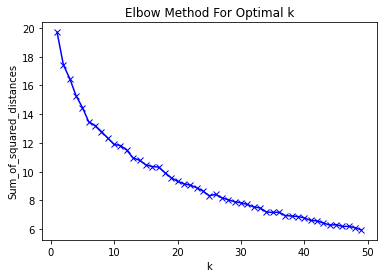

In [30]:
world_grouped_clustering = world_grouped.drop('City', 1)

Sum_of_squared_distances = []

K = range(1,50)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(world_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The line is pretty smooth but we can see a first elbow at around 10 and another one around 20. Since we have a relatively large number of cities, we will use 20 clusters to get similar cities in smaller groups.

In [31]:
# set number of clusters
kclusters = 20

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(world_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([ 0, 10,  0,  2, 14,  3,  8,  7,  4, 12], dtype=int32)

In [32]:
# add clustering labels
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

world_merged = dfCities

# merge world_grouped with dfCities to add latitude/longitude for each city
world_merged = world_merged.join(city_venues_sorted.set_index('City'), on='City')

world_merged.head()

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New York City,40.712728,-74.006015,4,Park,Bookstore,Ice Cream Shop,Scenic Lookout,Pier,Wine Shop,Garden,Thai Restaurant,American Restaurant,Bakery
1,London,51.507322,-0.127647,2,Hotel,Park,Art Museum,Department Store,Plaza,Garden,Bookstore,Theater,Cocktail Bar,Indian Restaurant
2,Shanghai,31.232276,121.469207,2,Hotel,Bakery,Dumpling Restaurant,Italian Restaurant,Coffee Shop,Burger Joint,Shopping Mall,Gym / Fitness Center,Park,French Restaurant
3,Tokyo,35.682839,139.759455,19,Hotel,BBQ Joint,Coffee Shop,Art Museum,Japanese Restaurant,Garden,Udon Restaurant,Soba Restaurant,History Museum,Chinese Restaurant
4,Hong Kong,22.350627,114.184916,2,Hotel,Park,Mountain,Café,Electronics Store,Coffee Shop,Thai Restaurant,Japanese Restaurant,Dessert Shop,Italian Restaurant


# Results

## Visualizing the cities and their clusters

In [33]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=2, tiles='Stamen Toner')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(world_merged['Latitude'], world_merged['Longitude'], world_merged['City'], world_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Detailed clusters with cities and most common venues

### Cluster 0

In [34]:
(world_merged.loc[world_merged['Cluster Labels'] == 0, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Mumbai,Indian Restaurant,Scenic Lookout,Ice Cream Shop,Hotel,Beach,Mountain,Seafood Restaurant,Coffee Shop,Fast Food Restaurant,Café
45,Casablanca,Beach,Coffee Shop,Café,Bakery,Hotel,Moroccan Restaurant,French Restaurant,Diner,Italian Restaurant,Shopping Mall
60,Bermuda,Restaurant,Beach,Resort,Seafood Restaurant,Park,Bar,Museum,Hotel,Coffee Shop,Café
74,Monaco,Hotel,Beach,French Restaurant,Garden,Mediterranean Restaurant,Ice Cream Shop,Park,Seafood Restaurant,Scenic Lookout,Plaza
83,Gibraltar,Beach,Restaurant,Spanish Restaurant,Hotel,Seafood Restaurant,Cocktail Bar,Café,Golf Course,Other Great Outdoors,Tapas Restaurant
89,Johannesburg,Shopping Mall,Coffee Shop,Restaurant,Italian Restaurant,Hotel,Golf Course,Gym / Fitness Center,Deli / Bodega,Café,African Restaurant
90,Panama,Hotel,Latin American Restaurant,Restaurant,Pizza Place,Shopping Mall,Resort,Supermarket,Peruvian Restaurant,Bakery,Café
92,Santiago,Supermarket,Coffee Shop,Shopping Mall,Bakery,Hotel,Gym,Ice Cream Shop,French Restaurant,Café,Park
111,Abidjan,African Restaurant,Nightclub,Shopping Mall,Hotel,Ice Cream Shop,Italian Restaurant,Lounge,Bar,Restaurant,Pizza Place
114,Abuja,Fast Food Restaurant,Shopping Mall,Hotel,Bed & Breakfast,Restaurant,Indian Restaurant,Department Store,Fried Chicken Joint,Ice Cream Shop,Arcade


### Cluster 1

In [35]:
(world_merged.loc[world_merged['Cluster Labels'] == 1, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
208,Hargeisa,Hotel,Pizza Place,Zoo,Fish & Chips Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,Fishing Spot,Fish Market
286,Palikir,Hotel,Airport,Zoo,Fish & Chips Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,Fishing Spot,Fish Market
364,Yaren,Hotel,Beach,Airport,Zoo,Fish Market,Food,Fondue Restaurant,Flower Shop,Flea Market,Fishing Spot


### Cluster 2

In [36]:
(world_merged.loc[world_merged['Cluster Labels'] == 2, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,London,Hotel,Park,Art Museum,Department Store,Plaza,Garden,Bookstore,Theater,Cocktail Bar,Indian Restaurant
2,Shanghai,Hotel,Bakery,Dumpling Restaurant,Italian Restaurant,Coffee Shop,Burger Joint,Shopping Mall,Gym / Fitness Center,Park,French Restaurant
4,Hong Kong,Hotel,Park,Mountain,Café,Electronics Store,Coffee Shop,Thai Restaurant,Japanese Restaurant,Dessert Shop,Italian Restaurant
5,Singapore,Hotel,Park,Japanese Restaurant,Bookstore,Cocktail Bar,Theme Park Ride / Attraction,Garden,Waterfront,Botanical Garden,Spanish Restaurant
6,Beijing,Hotel,Park,Historic Site,Shopping Mall,Brewery,Art Gallery,Bookstore,French Restaurant,Dumpling Restaurant,Mexican Restaurant
8,Shenzhen,Hotel,Theme Park Ride / Attraction,Mountain,Park,Japanese Restaurant,Coffee Shop,Café,Electronics Store,Art Gallery,Theater
16,Dubai,Hotel,Resort,Beach,Coffee Shop,Restaurant,Café,Plaza,Movie Theater,Multiplex,Shopping Mall
21,Amsterdam,Hotel,Park,Coffee Shop,Café,Breakfast Spot,Bakery,Yoga Studio,Bar,French Restaurant,Ice Cream Shop
39,Busan,Coffee Shop,Hotel,Park,Korean Restaurant,Trail,Market,Beach,Scenic Lookout,Department Store,Bakery
40,Kuala Lumpur,Hotel,Shopping Mall,Malay Restaurant,Japanese Restaurant,Grocery Store,Restaurant,Coffee Shop,Asian Restaurant,Café,Ice Cream Shop


### Cluster 3

In [37]:
(world_merged.loc[world_merged['Cluster Labels'] == 3, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Guangzhou,Hotel,Shopping Mall,Park,Electronics Store,Shopping Plaza,Golf Course,Turkish Restaurant,Resort,Spa,Coffee Shop
46,Qingdao,Hotel,Shopping Mall,Bar,Coffee Shop,Department Store,Aquarium,Café,Beach,Mountain,Turkish Restaurant
48,New Delhi,Hotel,Indian Restaurant,Café,Shopping Mall,Market,Italian Restaurant,Plaza,Restaurant,Monument / Landmark,Coffee Shop
117,Addis Ababa,Hotel,Italian Restaurant,Ethiopian Restaurant,Café,Restaurant,Pizza Place,Coffee Shop,Bar,Turkish Restaurant,Massage Studio
127,Antananarivo,Hotel,Restaurant,French Restaurant,Shopping Mall,African Restaurant,Asian Restaurant,Bar,Sushi Restaurant,Café,Hostel
128,Apia,Hotel,Department Store,Cocktail Bar,Restaurant,Burger Joint,Hotel Bar,Indian Restaurant,Movie Theater,Café,Pizza Place
134,Baghdad,Hotel,Café,Historic Site,Middle Eastern Restaurant,Burger Joint,Shopping Mall,Bakery,Fast Food Restaurant,Ice Cream Shop,Coffee Shop
140,Banjul,Hotel,Resort,African Restaurant,Café,Restaurant,Nature Preserve,Tapas Restaurant,Market,Tree,Pool
158,Brazzaville,Hotel,Fast Food Restaurant,Restaurant,Café,Portuguese Restaurant,Lounge,Pool,Plaza,Pizza Place,Cocktail Bar
181,Dar es Salaam,Hotel,Restaurant,Resort,Beach,Bar,Shopping Mall,Coffee Shop,African Restaurant,Seafood Restaurant,Pub


### Cluster 4

In [38]:
(world_merged.loc[world_merged['Cluster Labels'] == 4, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New York City,Park,Bookstore,Ice Cream Shop,Scenic Lookout,Pier,Wine Shop,Garden,Thai Restaurant,American Restaurant,Bakery
7,San Francisco,Park,Coffee Shop,Bakery,Yoga Studio,Bookstore,Grocery Store,Garden,Market,Art Museum,Ice Cream Shop
9,Zurich,Swiss Restaurant,Café,Park,Hotel,Bar,Cocktail Bar,Bakery,Coffee Shop,Pool,Gourmet Shop
14,Boston,Park,Bakery,Mexican Restaurant,Brewery,Bookstore,Seafood Restaurant,Wine Shop,Café,Trail,Salad Place
15,Frankfurt,Park,Café,Hotel,Art Museum,Coffee Shop,Apple Wine Pub,Wine Bar,German Restaurant,Supermarket,Gourmet Shop
22,Stockholm,Scandinavian Restaurant,Café,Park,Coffee Shop,Beer Bar,Bakery,Hotel,Cocktail Bar,Plaza,Gourmet Shop
23,Vancouver,Park,Beach,Trail,Hotel,Ice Cream Shop,Japanese Restaurant,Coffee Shop,Bakery,Taco Place,French Restaurant
24,Seoul,Park,BBQ Joint,Coffee Shop,Hotel,Sushi Restaurant,Bakery,Trail,Korean Restaurant,Chinese Restaurant,Fried Chicken Joint
26,Melbourne,Café,Park,Coffee Shop,Bakery,Beach,Wine Bar,Ice Cream Shop,Cocktail Bar,Plaza,Market
28,Hamburg,Coffee Shop,Café,Park,Ice Cream Shop,Bakery,Wine Bar,Cocktail Bar,Vietnamese Restaurant,Theater,Vegetarian / Vegan Restaurant


### Cluster 5

In [39]:
(world_merged.loc[world_merged['Cluster Labels'] == 5, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
324,South Tarawa,Motel,Airport,Zoo,Fishing Spot,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,Fish Market


### Cluster 6

In [40]:
(world_merged.loc[world_merged['Cluster Labels'] == 6, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
182,Dodoma,Rental Car Location,Bar,Pizza Place,Hotel,Filipino Restaurant,Fondue Restaurant,Flower Shop,Flea Market,Fishing Spot,Fish Market


### Cluster 7

In [41]:
(world_merged.loc[world_merged['Cluster Labels'] == 7, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
120,Algiers,Gaming Cafe,Arcade,Zoo,Fish Market,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,Fishing Spot


### Cluster 8

In [42]:
(world_merged.loc[world_merged['Cluster Labels'] == 8, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,Tel Aviv,Beach,Café,Park,Ice Cream Shop,Coffee Shop,Bakery,Bar,Asian Restaurant,Seafood Restaurant,Middle Eastern Restaurant
54,Jersey,Beach,Hotel,Historic Site,Restaurant,French Restaurant,Scenic Lookout,History Museum,Creperie,Surf Spot,Seafood Restaurant
62,Mauritius,Resort,Beach,Hotel,Café,Park,Surf Spot,Chinese Restaurant,Shopping Mall,Indian Restaurant,Golf Course
66,Cape Town,Beach,Hotel,Coffee Shop,Café,Trail,Supermarket,Seafood Restaurant,Italian Restaurant,Winery,Market
68,Bahamas,Beach,Resort,Hotel,Coffee Shop,Ice Cream Shop,Italian Restaurant,Mobile Phone Shop,Plaza,Restaurant,Caribbean Restaurant
71,British Virgin Islands,Beach,American Restaurant,Bar,Caribbean Restaurant,Hotel,Resort,Grocery Store,Pizza Place,Mexican Restaurant,Hardware Store
77,Cayman Islands,Caribbean Restaurant,Hotel,Resort,Italian Restaurant,Beach,Restaurant,Other Great Outdoors,Seafood Restaurant,Café,Mediterranean Restaurant
78,Guernsey,Beach,Hotel,Restaurant,French Restaurant,Café,Seafood Restaurant,Historic Site,Scenic Lookout,Creperie,Pub
85,Barbados,Caribbean Restaurant,Beach,Hotel,Café,Shopping Mall,Resort,Bar,Fast Food Restaurant,History Museum,Sandwich Place
118,Aden,Hotel,Surf Spot,Resort,Airport,Airport Food Court,Hotel Bar,Beach,Zoo,Fondue Restaurant,Flower Shop


### Cluster 9

In [43]:
(world_merged.loc[world_merged['Cluster Labels'] == 9, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
224,King Edward Point,Observatory,Movie Theater,Zoo,Fishing Spot,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,Fish Market


### Cluster 10

In [44]:
(world_merged.loc[world_merged['Cluster Labels'] == 10, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Abu Dhabi,Hotel,Resort,Beach,Shopping Mall,Food Truck,Movie Theater,Mosque,Art Museum,Sandwich Place,Electronics Store
94,Sofia,Hotel,Restaurant,Rest Area,Boarding House,Zoo,Food,Fondue Restaurant,Flower Shop,Flea Market,Fishing Spot
130,Asmara,Hotel,Airport,Campground,Vineyard,Cosmetics Shop,Electronics Store,Lounge,Restaurant,Field,Filipino Restaurant
136,Bamako,Hotel,Bar,Thai Restaurant,Park,Grocery Store,Greek Restaurant,Café,Pizza Place,Sports Club,Nightclub
139,Bangui,Hotel,Coffee Shop,Convenience Store,Airport,Zoo,Fish Market,Food,Fondue Restaurant,Flower Shop,Flea Market
149,Bissau,Hotel,Portuguese Restaurant,Port,Bakery,African Restaurant,Airport,Pizza Place,Hotel Bar,Plaza,Fish & Chips Shop
175,Conakry,Hotel,Restaurant,Pier,Turkish Restaurant,Electronics Store,Shopping Mall,Nightclub,French Restaurant,Pedestrian Plaza,African Restaurant
218,Juba,Hotel,Restaurant,Café,Grocery Store,Resort,African Restaurant,Food,Fondue Restaurant,Flower Shop,Flea Market
249,Malabo,Hotel,Hotel Bar,Restaurant,Resort,Café,Motel,French Restaurant,Zoo,Fish Market,Flower Shop
265,Moroni,Hotel,Resort,Airport,Zoo,Adult Boutique,Farm,Farmers Market,Falafel Restaurant,Fast Food Restaurant,Field


### Cluster 11

In [45]:
(world_merged.loc[world_merged['Cluster Labels'] == 11, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
192,Flying Fish Cove,National Park,Airport,Diner,Zoo,Flea Market,Food Court,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop
194,Funafuti,Bed & Breakfast,Airport,Zoo,Fishing Spot,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,Fish Market
248,Majuro,Grocery Store,Convenience Store,Airport,Hotel,Zoo,Fish Market,Food,Fondue Restaurant,Flower Shop,Flea Market
258,Mata Utu,Restaurant,Airport,Zoo,Fish Market,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,Fishing Spot
330,Stanley,Airport,Grocery Store,Port,Hotel,Diner,Zoo,Fish Market,Fondue Restaurant,Flower Shop,Flea Market


### Cluster 12

In [46]:
(world_merged.loc[world_merged['Cluster Labels'] == 12, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Montreal,Café,Park,Bakery,Restaurant,Grocery Store,Coffee Shop,French Restaurant,Bagel Shop,Japanese Restaurant,Spa
43,Wellington,Café,Coffee Shop,Restaurant,Brewery,Bar,Gym,Beach,Indie Movie Theater,Park,Burger Joint
102,Kuwait City,Coffee Shop,Café,Shopping Mall,Frozen Yogurt Shop,Burger Joint,Juice Bar,Japanese Restaurant,Ice Cream Shop,Gym / Fitness Center,Breakfast Spot
121,Alofi,Café,Resort,Indian Restaurant,Warehouse Store,Airport,Hostel,Restaurant,Japanese Restaurant,Farm,Fish Market
122,Amman,Café,Coffee Shop,Middle Eastern Restaurant,Dessert Shop,Ice Cream Shop,Bakery,Italian Restaurant,Burger Joint,Historic Site,Falafel Restaurant
133,Avarua,Café,Resort,Restaurant,Airport,Sandwich Place,Seafood Restaurant,Harbor / Marina,Hostel,Miscellaneous Shop,Fast Food Restaurant
211,Honiara,Café,Airport,Australian Restaurant,Shopping Mall,Zoo,Fish Market,Food,Fondue Restaurant,Flower Shop,Flea Market
220,Kampala,Café,Hotel,Coffee Shop,African Restaurant,Resort,Shopping Mall,Fast Food Restaurant,Restaurant,Indian Restaurant,Beer Garden
255,Mariehamn,Café,Hotel,Restaurant,Beach,Scandinavian Restaurant,Grocery Store,Harbor / Marina,Bar,Burger Joint,Seafood Restaurant
344,Tórshavn,Café,Hotel,Scandinavian Restaurant,Lighthouse,Steakhouse,Coffee Shop,Tourist Information Center,Hotel Bar,Hostel,Duty-free Shop


### Cluster 13

In [47]:
(world_merged.loc[world_merged['Cluster Labels'] == 13, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
261,Mogadishu,Automotive Shop,Hotel,Restaurant,Beach,Fish Market,Food,Fondue Restaurant,Flower Shop,Flea Market,Fishing Spot


### Cluster14

In [48]:
(world_merged.loc[world_merged['Cluster Labels'] == 14, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
116,Adamstown,Nature Preserve,Zoo,Food Stand,Food Court,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,Fishing Spot


### Cluster 15

In [49]:
(world_merged.loc[world_merged['Cluster Labels'] == 15, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Luxembourg,Hotel,French Restaurant,Bar,Park,Italian Restaurant,Restaurant,Café,Sculpture Garden,Trail,Golf Course
12,Edinburgh,Café,Hotel,Park,Coffee Shop,Pub,Beer Bar,Bar,Cocktail Bar,Scenic Lookout,Pizza Place
18,"Washington, D.C.",American Restaurant,Fast Food Restaurant,Pizza Place,Brewery,Bakery,Park,Ice Cream Shop,State / Provincial Park,Trail,Mountain
38,Osaka,Theme Park Ride / Attraction,Ramen Restaurant,Coffee Shop,Hotel,Park,Sake Bar,Bar,Dessert Shop,Japanese Curry Restaurant,American Restaurant
49,Oslo,Bar,Coffee Shop,Bakery,Park,Cocktail Bar,Movie Theater,Pizza Place,Burger Joint,Brewery,Restaurant
70,Cyprus,Café,Restaurant,Coffee Shop,Hotel,Bar,Seafood Restaurant,Gym / Fitness Center,Historic Site,Greek Restaurant,Gym
72,Malta,Bay,Mediterranean Restaurant,Bar,Historic Site,Hotel,Beach,Café,Italian Restaurant,Garden,Lounge
75,Vilnius,Coffee Shop,Café,Hotel,Scenic Lookout,Bar,Gym,Park,Plaza,Gym / Fitness Center,Pizza Place
76,Isle of Man,Pub,Park,Restaurant,Coffee Shop,Bar,Café,History Museum,Beach,Ice Cream Shop,Museum
81,GIFT City-Gujarat,Indian Restaurant,Multiplex,Café,Fast Food Restaurant,Dessert Shop,Restaurant,Pizza Place,Sandwich Place,Coffee Shop,Ice Cream Shop


### Cluster 16

In [50]:
(world_merged.loc[world_merged['Cluster Labels'] == 16, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
360,West Island,Bar,Buffet,Airport,Zoo,Fishing Spot,Food Court,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop


### Cluster 17

In [51]:
(world_merged.loc[world_merged['Cluster Labels'] == 17, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
156,Brasília,Athletics & Sports,Art Gallery,National Park,Fishing Spot,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,Zoo


### Cluster 18

In [52]:
(world_merged.loc[world_merged['Cluster Labels'] == 18, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
200,Gitega,Restaurant,Pizza Place,Hotel,Diner,Resort,Ice Cream Shop,African Restaurant,Bistro,Beach,Border Crossing
201,Bujumbura,Restaurant,Pizza Place,Hotel,Diner,African Restaurant,Bistro,Beach,Zoo,Fondue Restaurant,Flower Shop


### Cluster 19

In [53]:
(world_merged.loc[world_merged['Cluster Labels'] == 19, world_merged.columns[[0]+[4]+list(range(5, world_merged.shape[1]))]]).drop_duplicates(subset=['City'])

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Tokyo,Hotel,BBQ Joint,Coffee Shop,Art Museum,Japanese Restaurant,Garden,Udon Restaurant,Soba Restaurant,History Museum,Chinese Restaurant
10,Los Angeles,Ice Cream Shop,Hotel,Trail,Park,Farmers Market,Italian Restaurant,Theme Park,Theater,Coffee Shop,Grocery Store
13,Geneva,Hotel,French Restaurant,Park,Coffee Shop,Italian Restaurant,Bar,Plaza,Farmers Market,Dessert Shop,Beach
17,Paris,Plaza,Hotel,Art Museum,French Restaurant,Wine Bar,Bookstore,Ice Cream Shop,Park,Garden,Seafood Restaurant
19,Chicago,Hotel,Park,Trail,Coffee Shop,Waterfront,Yoga Studio,Liquor Store,Pizza Place,Ice Cream Shop,Diner
27,Madrid,Plaza,Restaurant,Spanish Restaurant,Park,Tapas Restaurant,Art Museum,Coffee Shop,Monument / Landmark,Gourmet Shop,Gym / Fitness Center
37,Milan,Hotel,Plaza,Pizza Place,Park,Ice Cream Shop,Italian Restaurant,Monument / Landmark,Cocktail Bar,Bakery,Museum
52,Rome,Plaza,Ice Cream Shop,Historic Site,Monument / Landmark,Hotel,Church,Fountain,Park,Sandwich Place,Museum
53,Vienna,Park,Austrian Restaurant,Plaza,Hotel,Palace,Japanese Restaurant,Pizza Place,Gastropub,Art Museum,Ice Cream Shop
58,Lisbon,Plaza,Portuguese Restaurant,Scenic Lookout,Park,Hotel,Garden,Café,Ice Cream Shop,Tapas Restaurant,Bakery


# Discussion

The results show that cities can be grouped together by looking at their venues. At first glance, we can see that very large cities or cities from countries with similar cultural backgrounds seem to have a tendency to group together. If we look closer into each cluster, we can see that some cities are ouliers and belong to their own small clusters. This seems to happen for smaller cities with a lower number of venues. Also, some cities have coordinates the put them in wrong places. Further work would be needed to correct these. For now, looking at both the map and the cluster details is sufficient to work around this problem. 

By analysing the clusters, we can find useful information about cities that might be similar in experience. For example, cluster 4 have a group of cities where parks are the most common venue and cluster 12 has cities with a lot of cafés. Cluster 8 consists of a group of cities where beaches are the most common.

# Conclusion

The question we wanted to answer were the following. How is one city similar to the others? What are the most common venues that set these cities appart? In the discussion section, we set forward that the current city clustering analysis was able to answer these questions. 

If you are a seasoned globetrotter, by looking at the data, you might decide you want to explore the idea of a trip to Tel Aviv if you like beaches. Maybe you would'nt have thought of going to a city that large and expect to find this kind of venue.

If on the other hand, you are a traveling business man, you might plan your meetings better by knowing that Singapore, where youhave never been, is similar to London that you know very well.